In [22]:
from skimage.filters import rank
from skimage.measure import regionprops
import Dataset
import numpy as np
from Utils import visualize
from Utils import image_to_grayscale
from skimage import color

dataset_list = Dataset.get_full_dataset()

In [23]:
MINIMAL_GRAY = 80
MINIMAL_GRAY_MARKER = 170

print(f'Minimal gray: {MINIMAL_GRAY}',
      f'Minmal gray for marker: {MINIMAL_GRAY_MARKER}',
      sep='\n')

Minimal gray: 80
Minmal gray for marker: 170


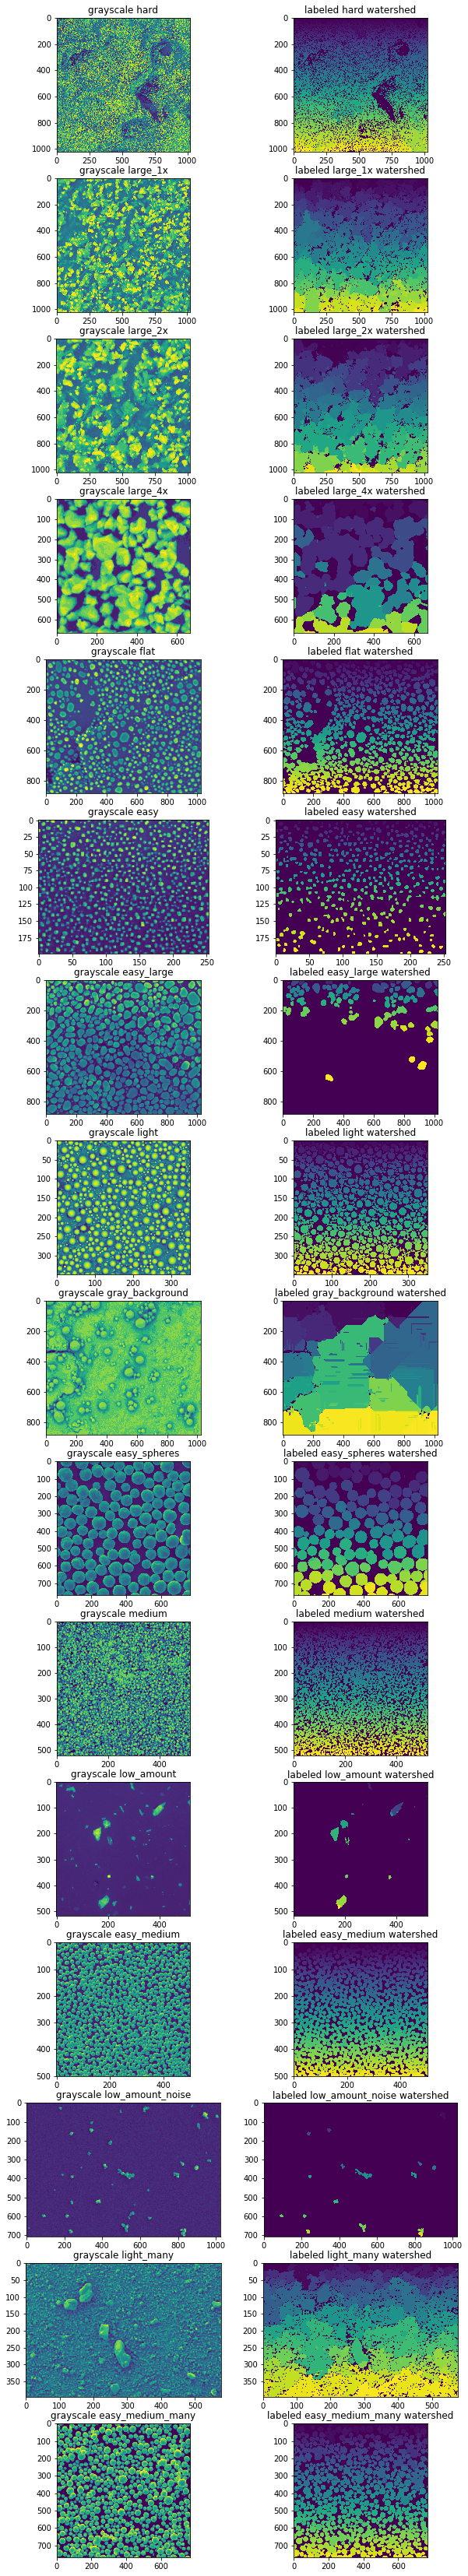

In [24]:
from scipy.ndimage import distance_transform_edt, label
from skimage.morphology import watershed, disk
import matplotlib.pyplot as plot 

log = []
row_amount = len(dataset_list)

plot.figure(figsize=(10, 60))
for i, data in enumerate(dataset_list):
    image, title = data['image'], data['title']
    
    image = color.rgb2gray(image)
    image = rank.median(image, disk(2))     # denoise
    
    plot.subplot(row_amount, 2, i*2 + 1)
    plot.imshow(image)
    plot.title(f'grayscale {title}')
    
    # body
    
    distance = distance_transform_edt(image > MINIMAL_GRAY)
    markers, amount = label(image > MINIMAL_GRAY_MARKER)
    watershed_result = watershed(-distance, 
                             markers, 
                             mask=image > MINIMAL_GRAY)
    
    
    plot.subplot(row_amount, 2, i*2 + 2)
    plot.imshow(watershed_result)
    plot.title(f'labeled {title} watershed')
    
    log.append(f'amount {title} watershed: {amount}')
    
plot.show()

In [25]:
print(*log, sep='\n')

amount hard watershed: 13592
amount large_1x watershed: 1500
amount large_2x watershed: 1099
amount large_4x watershed: 181
amount flat watershed: 910
amount easy watershed: 428
amount easy_large watershed: 111
amount light watershed: 611
amount gray_background watershed: 702
amount easy_spheres watershed: 952
amount medium watershed: 2559
amount low_amount watershed: 26
amount easy_medium watershed: 1186
amount low_amount_noise watershed: 33
amount light_many watershed: 608
amount easy_medium_many watershed: 1166
